In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


In [101]:
pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 812.7 kB/s eta 0:00:12
     ---------------------------------------- 0.1/9.2 MB 1.1 MB/s eta 0:00:09
      --------------------------------------- 0.2/9.2 MB 1.2 MB/s eta 0:00:08
     - -------------------------------------- 0.3/9.2 MB 1.4 MB/s eta 0:00:07
     - -------------------------------------- 0.4/9.2 MB 1.5 MB/s eta 0:00:06
     - -------------------------------------- 0.4/9.2 MB 1.4 MB/s eta 0:00:07
     - -------------------------------------- 0.4/9.2 MB 1.4 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/9.2 MB 1.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/9.2 MB 1.5 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/9.2 MB 1.5 MB/s eta 0:00:06
     -- ------------------------------------- 0.7/9.2 MB 1.2 MB/s eta 0:00:0


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Dear\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [48]:
# Specify the path to your CSV file
egg_data = 'GallusGallusDomesticus.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(egg_data)
data.head()

,GallusID,GallusBreed,Day,Age,GallusWeight,GallusEggColor,GallusEggWeight,AmountOfFeed,EggsPerDay,GallusCombType,SunLightExposure,GallusClass,GallusLegShanksColor,GallusBeakColor,GallusEarLobesColor,GallusPlumage
0,Marans1,Marans,1,883,3000,Brown,41.19,114,1,Single,7,Continental,White,White,NaN,Blue Copper
1,Marans1,Marans,2,883,3000,Brown,41.19,114,1,Single,7,Continental,White,White,NaN,Blue Copper
2,Marans1,Marans,3,883,3000,Brown,41.19,114,1,Single,7,Continental,White,White,NaN,Blue Copper
3,Marans1,Marans,4,883,3000,Brown,41.19,114,1,Single,7,Continental,White,White,NaN,Blue Copper
4,Marans1,Marans,5,883,3000,Brown,41.19,114,1,Single,7,Continental,White,White,NaN,Blue Copper


In [90]:
print ('---- Descriptive Statistics ----')

# 1. Berapa rata-rata umur ayam?
age = data['Age'].mean()
print (f'Rata-rata umur ayam adalah {age} hari')
print ('----------------------------------')

# 2. Berapa rata-rata berat ayam dari 2 breed?
breed = data.groupby('GallusBreed')['GallusWeight'].mean()
print (f'Rata-rata berat ayam dari 2 breed adalah :\n {breed}')
print ('----------------------------------')


# 3. Apa variansi dari berat telur 2 breed sama?
variance = data.groupby('GallusBreed')['GallusEggWeight'].var()
print (f'Variansi berat telur dari kedua breed adalah :\n {variance}')
print ('----------------------------------')


# 4. Mana yang lebih banyak terpapar matahari, ayam dari usia di atas 500 hari atau di bawah 500 hari?
above_500 = data['Age'] > 500
under_500 = data['Age'] <= 500

avg_sun_above = data[above_500]['SunLightExposure'].mean()
avg_sun_under = data[under_500]['SunLightExposure'].mean()

print (f'Rata-rata waktu terpapar matahari untuk ayam berusia di atas 500 hari adalah {avg_sun_above:.2f} jam')
print (f'Rata-rata waktu terpapar matahari untuk ayam berusia di bawah 500 hari adalah {avg_sun_under:.2f} jam')
print ('----------------------------------')


# 5. Mana yang lebih tinggi, rata-rata berat telur dari breed Ameraucana atau Marans?
avg_ameraucana = data[data['GallusBreed'] == 'Ameraucana']['GallusEggWeight'].mean()
avg_marans = data[data['GallusBreed'] == 'Marans']['GallusEggWeight'].mean()

print (f'Rata-rata berat telur dari breed Ameraucana adalah {avg_ameraucana:.2f} gram')
print (f'Rata-rata berat telur dari breed Marans adalah {avg_marans:.2f} gram')
print ('----------------------------------')


# 6. Mana yang lebih tinggi, rata-rata pakan untuk breed Ameraucana atau Marans?
avg_feed_ameraucana = data[data['GallusBreed'] == 'Ameraucana']['AmountOfFeed'].mean()
avg_feed_marans = data[data['GallusBreed'] == 'Marans']['AmountOfFeed'].mean()

print (f'Rata-rata pakan untuk breed Ameraucana adalah {avg_feed_ameraucana:.2f} gram')
print (f'Rata-rata pakan untuk breed Marans adalah {avg_feed_marans:.2f} gram')
print ('----------------------------------')


# 6. Mana yang lebih tinggi: 
# - rata-rata berat telur ayam dari breed Ameraucana dengan makanan di atas 110 gram atau 
# - rata-rata berat telur ayam dari breed Marans dengan makanan di atas 100 gram

feed_110 = data[data['AmountOfFeed'] >= 100]
avg_egg_ameraucana = feed_110[feed_110['GallusBreed'] == 'Ameraucana']['GallusEggWeight'].mean()
avg_egg_marans = feed_110[feed_110['GallusBreed'] == 'Marans']['GallusEggWeight'].mean()

print (f'Rata-rata berat telur ayam dari breed Ameraucana dengan makanan di atas 110 gram adalah {avg_egg_ameraucana:.2f} gram')
print (f'Rata-rata berat telur ayam dari breed Marans dengan makanan di atas 110 gram adalah {avg_egg_marans:.2f} gram')
print ('----------------------------------')



---- Descriptive Statistics ----
Rata-rata umur ayam adalah 522.01 hari
1000
----------------------------------
Rata-rata berat ayam dari 2 breed adalah :
 GallusBreed
Ameraucana    1951.428571
Marans        2249.106145
Name: GallusWeight, dtype: float64
----------------------------------
Variansi berat telur dari kedua breed adalah :
 GallusBreed
Ameraucana    23.477203
Marans        53.168150
Name: GallusEggWeight, dtype: float64
----------------------------------
Rata-rata waktu terpapar matahari untuk ayam berusia di atas 500 hari adalah 8.38 jam
Rata-rata waktu terpapar matahari untuk ayam berusia di bawah 500 hari adalah 8.21 jam
----------------------------------
Rata-rata berat telur dari breed Ameraucana adalah 50.80 gram
Rata-rata berat telur dari breed Marans adalah 42.56 gram
----------------------------------
Rata-rata pakan untuk breed Ameraucana adalah 111.14 gram
Rata-rata pakan untuk breed Marans adalah 116.85 gram
----------------------------------
Rata-rata berat tel

In [61]:
print ('---- Discrete Variables ----')
# 1. Apakah tiap breed memiliki proporsi jumlah ayam yang sama?
breed_counts = data['GallusBreed'].value_counts()
total_count = len(data)
breed_proportions = breed_counts / total_count

print("Proportion of each brand: \n", breed_proportions)
print ('----------------------------------')

# 2. Warna telur favorit adalah cokelat. Berapa peluang ayam bertelur cokelat?
prob_egg_brown = data[data['GallusEggColor'] == 'Brown']['GallusEggColor'].count() / len(data)
print (f'Peluang ayam bertelur cokelat adalah {prob_egg_brown:.2f}')
print ('----------------------------------')

# 3. Berapa peluang ayam tersebut bertelur tiap hari jika berasal dari breed Ameraucana?
data_ameraucana = data[data['GallusBreed'] == 'Ameraucana']
prob_egg_everyday_a = data_ameraucana['EggsPerDay'].sum() / len(data_ameraucana)
print (f'Peluang ayam breed Ameraucana bertelur tiap hari adalah {prob_egg_everyday_a:.2f}')
print ('----------------------------------')

# 4. Berapa peluang ayam tersebut bertelur tiap hari jika berasal dari breed Marans?
data_marans = data[data['GallusBreed'] == 'Marans']
prob_egg_everyday_m = data_marans['EggsPerDay'].sum() / len(data_marans)
print (f'Peluang ayam breed Marans bertelur tiap hari adalah {prob_egg_everyday_m:.2f}')
print ('----------------------------------')

# 5. Untuk mempermudah mencari ayam dari jenis tertentu maka digunakan warna bulunya. Warna apa yang paling dominan dari kedua breed dan berapa probabilitasnya?
color_ameraucana = data_ameraucana['GallusPlumage'].value_counts().idxmax()
color_marans = data_marans['GallusPlumage'].value_counts().idxmax()

prob_ameraucana_bw = data_ameraucana[data_ameraucana['GallusPlumage'] == 'Blue Wheaten']['GallusPlumage'].count() / len(data_ameraucana)
prob_marans_blue = data_marans[data_marans['GallusPlumage'] == 'Blue']['GallusPlumage'].count() / len(data_marans)

print (f'Warna paling dominan dari breed Ameraucana adalah {color_ameraucana}')
print (f'Warna paling dominan dari breed Marans adalah {color_marans}')
print (f'Peluang ayam berwarna Blue Wheaten jika berasal dari breed Ameraucana adalah {prob_ameraucana_bw:.2f}')
print (f'Peluang ayam berwarna Blue jika berasal dari breed Marans adalah {prob_marans_blue:.2f}')
print ('----------------------------------')


---- Discrete Variables ----
Proportion of each brand: 
 GallusBreed
Marans        0.895
Ameraucana    0.105
Name: count, dtype: float64
----------------------------------
Peluang ayam bertelur cokelat adalah 0.90
----------------------------------
Peluang ayam breed Ameraucana bertelur tiap hari adalah 1.00
----------------------------------
Peluang ayam breed Marans bertelur tiap hari adalah 0.96
----------------------------------
Warna paling dominan dari breed Ameraucana adalah Blue Wheaten
Warna paling dominan dari breed Marans adalah Blue
Peluang ayam berwarna Blue Wheaten jika berasal dari breed Ameraucana adalah 0.24
Peluang ayam berwarna Blue jika berasal dari breed Marans adalah 0.26
----------------------------------


----- Continuous Variables -----


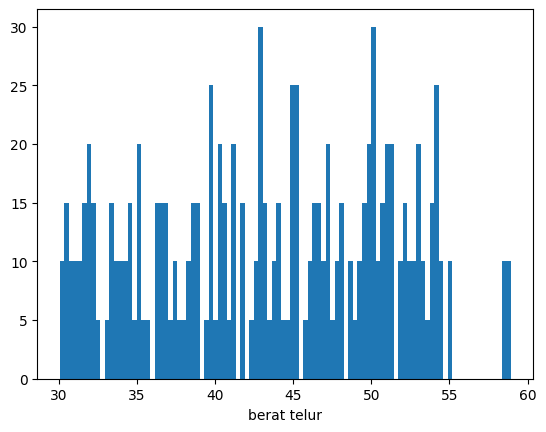

----------------------------------
Rata-rata berat telur adalah 43.43 gram
Variansi berat telur adalah 56.41 gram
----------------------------------
Peluang telur memiliki berat kurang dari 40 gram adalah 0.32
----------------------------------
Peluang telur memiliki berat lebih dari 50 gram adalah 0.19
----------------------------------
Peluang telur masuk Grade A adalah 0.36
----------------------------------


In [79]:
print ('----- Continuous Variables -----')
# 1. Bagaimana bentuk distribusi berat telur?
egg_weight = data['GallusEggWeight']

plt.hist(egg_weight, bins=100)
plt.xlabel("berat telur")
plt.show()
print ('----------------------------------')

# 2. Berapa rata-rata dan varians dari berat telur?
mean = egg_weight.mean()
var = egg_weight.var()
print (f'Rata-rata berat telur adalah {mean:.2f} gram')
print (f'Variansi berat telur adalah {var:.2f} gram')
print ('----------------------------------')

# 3. Berapa peluang sebutir telur memiliki berat kurang dari 40 gram?
x = 40
std = np.sqrt(var)
prob_less_40 = norm.cdf(x, mean, std)
print(f'Peluang telur memiliki berat kurang dari 40 gram adalah {prob_less_40:.2f}') 
print ('----------------------------------')

# 4. Berapa peluang sebutir telur memiliki berat lebih dari 50 gram?
x = 50
prob_more_50 = 1-norm.cdf(x, mean, std)
print(f'Peluang telur memiliki berat lebih dari 50 gram adalah {prob_more_50:.2f}')
print ('----------------------------------')

# 5. Jika telur yang termasuk Grade A adalah yang memiliki berat antara 45 - 55 gram, berapa peluang telur masuk Grade A?
x1 = 45
x2 = 55
P1 = norm.cdf(x1, mean, std)
P2 = norm.cdf(x2, mean, std)
P = P2 - P1
print (f'Peluang telur masuk Grade A adalah {P:.2f}')
print ('----------------------------------')



----- Correlation -----


,GallusEggWeight,GallusWeight
GallusEggWeight,1.00000,-0.10181
GallusWeight,-0.10181,1.00000


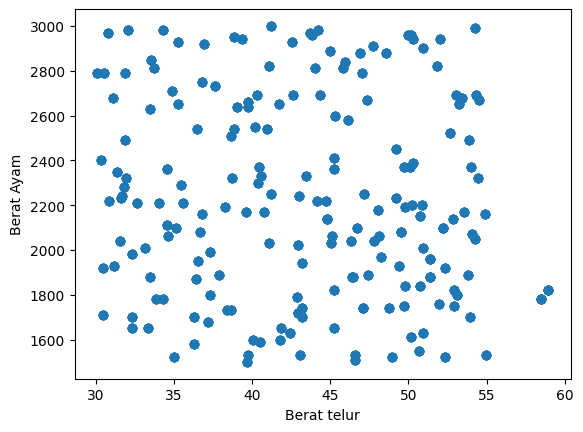

In [83]:
print ('----- Correlation -----')
# 1. Apakah ada korelasi antara berat telur dengan berat ayam?

plt.scatter(data['GallusEggWeight'], data['GallusWeight'])
plt.xlabel('Berat telur')
plt.ylabel('Berat Ayam')
data[['GallusEggWeight', 'GallusWeight']].corr()


,GallusEggWeight,AmountOfFeed
GallusEggWeight,1.000000,-0.068021
AmountOfFeed,-0.068021,1.000000


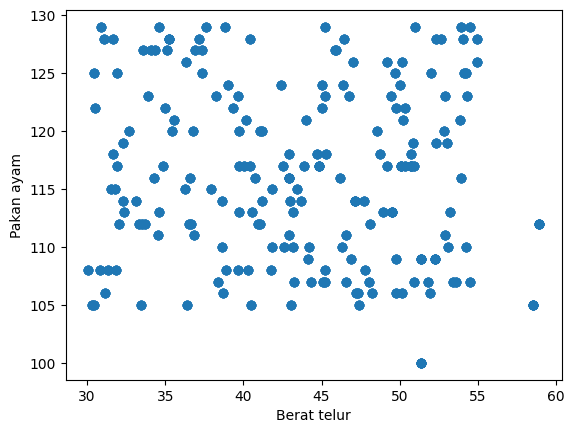

In [84]:
# 2. Apakah ada korelasi antara berat telur dengan jumlah pakan ayam?
plt.scatter(data['GallusEggWeight'], data['AmountOfFeed'])
plt.xlabel('Berat telur')
plt.ylabel('Pakan ayam')
data[['GallusEggWeight', 'AmountOfFeed']].corr()


,GallusEggWeight,Age
GallusEggWeight,1.000000,0.077701
Age,0.077701,1.000000


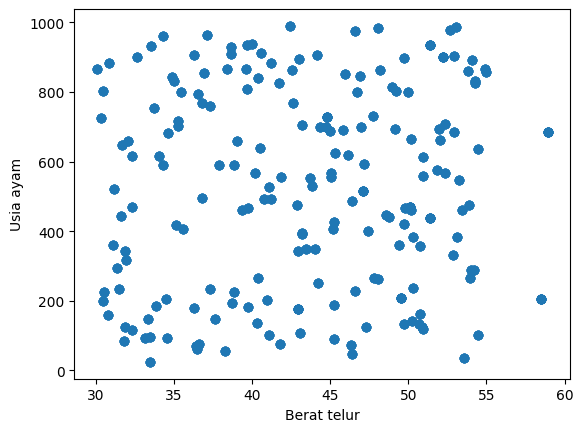

In [87]:

# 3. Apakah ada korelasi antara berat telur dengan usia?
plt.scatter(data['GallusEggWeight'], data['Age'])
plt.xlabel('Berat telur')
plt.ylabel('Usia ayam')
data[['GallusEggWeight', 'Age']].corr()

Nilai hasil uji statistik (z) adalah :  -5.129891760425765
Dengan nilai uji statistik -5.129891760425765  dan nilai z_crit 1.6448536269514722
Menerima hipotesis nol. Mayoritas ayam tidak dapat dikatakan bertelur berwarna cokelat.


C:\Users\Dear\AppData\Local\Temp\ipykernel_1980\1535906527.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


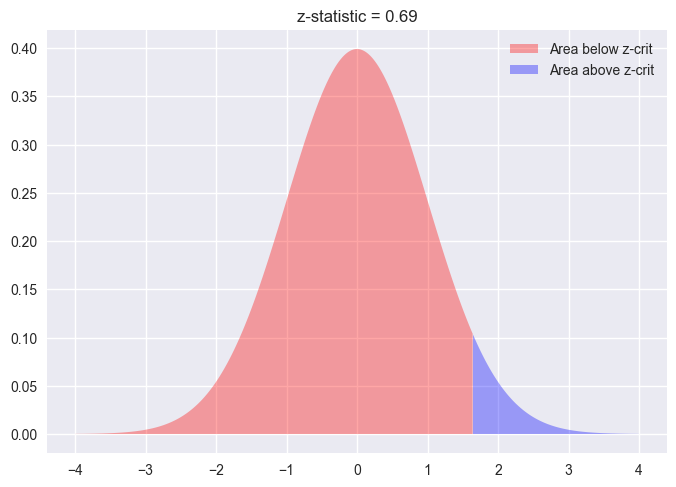

In [115]:

# 1. Apakah telur ayam mayoritas berwarna cokelat? Dikatakan mayoritas jika lebih dari 95% ayam bertelur warna cokelat.
# Jika dari 1000 sampel telur, 90% berwarna cokelat. Apakah 90% telah menjadi bukti bahwa lebih dari 95% ayam bertelur warna cokelat?

import scipy.stats as stats
import math

# H0 = Mayoritas ayam tidak bertelur warna cokelat (proporsi < 95%)
# H1 = Mayoritas ayam bertelur warna coklat (proporsi >= 95%)

# Menentukan jumlah kejadian ukuran sampel (n), proporsi pada null hypothesis, dan proporsi sample
n = 1000
p_null = 0.95
p_sample = 0.9

# Hitung uji statistik
test_stat=(p_sample-p_null)/(math.sqrt((p_null*(1-p_sample))/(n)))
print("Nilai hasil uji statistik (z) adalah : ", test_stat)

# Nilai Critical Value berdasarkan critical Z-value dari Z-table dengan nilai alpha 0.05
z_crit=stats.norm.ppf(1-0.05)  # 1-0.05 karena uji 1 sisi
print("Dengan nilai uji statistik", test_stat," dan nilai z_crit", z_crit )

# Visualisasi
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.645,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.645,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-crit'
                 )

plt.fill_between(x=np.arange(1.645,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.645,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-crit')
plt.legend()
plt.title ('z-statistic = 0.69');


# Uji hipotesis
if test_stat > z_crit:
    print("Hipotesis nol ditolak. Terdapat cukup bukti untuk menyatakan bahwa mayoritas ayam bertelur berwarna cokelat.")
else:
    print("Menerima hipotesis nol. Mayoritas ayam tidak dapat dikatakan bertelur berwarna cokelat.")


Nilai hasil uji statistik (z) adalah :  -2.6358852059333993
Nilai p value adalah:  0.9958040942075617
Nilai critical Z adalah 1.959963984540054
Menerima hipotesis nol. Tidak ada perbedaan yang signifikan antara proporsi telur ayam Mallus dan ayam Ameraucana yang berukuran besar.


C:\Users\Dear\AppData\Local\Temp\ipykernel_1980\1911950290.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


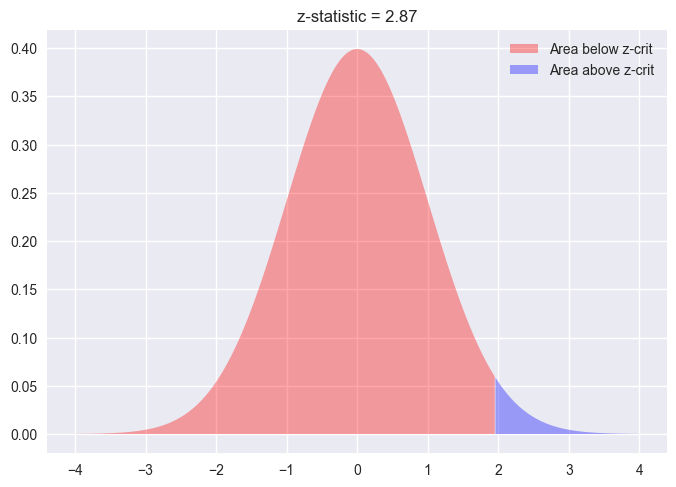

In [119]:
from statsmodels.stats.proportion import proportions_ztest
# 2. 1. Proporsi telur ayam Mallus lebih besar. 
# Jika dari 400 ekor ayam Mallus 160 diantaranya berukuran besar. 
# Sementara dari 300 ayam Ameraucana 150 diantaranya berukuran besar.   

# H0= Tidak ada perbedaan antara proporsi ayam Mallus dan ayam Ameraucana yang berukuran besar.
# H1= Ada perbedaan antara proporsi ayam Mallus dan ayam Ameraucana yang berukuran besar.

n = np.array([160, 150])
p = np.array([400,300])

# Hitung uji statistik dan p_value
(test_stat, p_value) = proportions_ztest(number_of_successes, total_sample_sizes,alternative='larger')
print("Nilai hasil uji statistik (z) adalah : ",test_stat)
print("Nilai p value adalah: ", p_value)

# Nilai Critical Value berdasarkan critical Z-value dari Z-table dengan nilai alpha 0.025
import scipy.stats as stats
z_crit=stats.norm.ppf(1-0.025) # two-tailed test
print("Nilai critical Z adalah",z_crit)

# Visualisasi
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.96,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.96,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-crit'
                 )

plt.fill_between(x=np.arange(1.96,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.96,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-crit')
plt.legend()
plt.title ('z-statistic = 2.87');

# Uji hipotesis
if p_value<0.025:
  print("Hipotesis nol ditolak. Terdapat perbedaan yang signifikan antara proporsi telur ayam Mallus dan ayam Ameraucana yang berukuran besar.")
else:
  print("Menerima hipotesis nol. Tidak ada perbedaan yang signifikan antara proporsi telur ayam Mallus dan ayam Ameraucana yang berukuran besar.")


In [124]:
# 3. Variansi berat ayam antara breed Ameraucana dan Marans sama.
import scipy.stats as stats
import math
# grup 1 = ayam Ameraucana
# grup 2 = ayam Marans
rataan1 = 1951.43
rataan2 = 2249.11

# Menentukan sample variance
s_x = 23.48
s_y = 53.17

# Ukuran sampel dua kelompok
sample1 = 900
sample2 = 100

# Hitung uji statistik
f_test=s_x/s_y
print("Nilai hasil uji statistik adalah : ", f_test)

# Nilai Critical Value berdasarkan critical f-value dari f-table dengan nilai alpha 0.05
import scipy.stats as stats
f_crit=stats.f.ppf(1-0.05, (sample1-1), (sample2-1))
print("Dengan nilai uji statistik", f_test,"dan nilai critical f", stats.f.ppf(1-0.05,(sample1 - 1),(sample2 - 1)) )

# Uji hipotesis
if f_test>f_crit:
  print("Hipotesis nol ditolak. Variansi berat telur antara ayam Ameraucana dan ayam Marans tidak sama.")
else:
  print("Menerima hipotesis nol. Variansi berat telur antara ayam Ameraucana dan ayam Marans sama.")

Nilai hasil uji statistik adalah :  0.4416024073725785
Dengan nilai uji statistik 0.4416024073725785 dan nilai critical f 1.2988614869863846
Menerima hipotesis nol. Variansi berat telur antara ayam Ameraucana dan ayam Marans sama.
